# Customer Segmentation Using RFM Analysis
The objective is to group these consumrs in customer segments by using Clustering Technique. We can analyse the customers by using the RFM approach. 

## Import Libraries

In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go



from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

## Data Description

In [3]:
df = pd.read_excel('sales_data.xlsx')
df1 = df.copy()
df1.head()

CustomerID  TOTAL_ORDERS   REVENUE  AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  \
0          22           124  11986.54                96.67            529.59   
1          29            82  11025.96               134.46             97.92   
2          83            43   7259.69               168.83            171.69   
3          95            44   6992.27               158.92             92.82   
4         124            55   6263.44               113.88            179.04   

   AVERAGESHIPPING FIRST_ORDER_DATE LATEST_ORDER_DATE  AVGDAYSBETWEENORDERS  \
0             4.27       2016-12-30        2021-10-24                 14.19   
1             1.19       2018-03-31        2021-10-24                 15.89   
2             3.99       2017-11-30        2021-10-24                 33.12   
3             2.11       2019-04-09        2021-10-24                 21.11   
4             3.26       2020-10-23        2021-10-24                  6.65   

   DAYSSINCELASTORDER  ...  WEEK3_DAY16_DAY23_REVENUE  \
0                   1  ...                    2592.18   
1                   1  ...                    2807.66   
2                   1  ...                     713.94   
3                   1  ...                     997.02   
4                   1  ...                    2725.66   

   WEEK4_DAY24_DAY31_REVENUE  TIME_0000_0600_ORDERS  TIME_0601_1200_ORDERS  \
0                    2409.71                     12                     61   
1                    4106.19                      1                     13   
2                    2861.90                      0                      6   
3                    1260.08                      0                     10   
4                     768.46                      6                      9   

   TIME_1200_1800_ORDERS  TIME_1801_2359_ORDERS  TIME_0000_0600_REVENUE  \
0                     37                     14                 1067.92   
1                     24                     44                   30.25   
2                     12                     25                    0.00   
3                     13                     21                    0.00   
4                     27                     13                  501.34   

   TIME_0601_1200_REVENUE  TIME_1200_1800_REVENUE  TIME_1801_2359_REVENUE  
0                 5674.65                 3916.53                 1327.44  
1                 3143.69                 2205.47                 5646.55  
2                  707.98                 2560.91                 3990.80  
3                 1908.99                 2025.05                 3058.23  
4                 1197.83                 3004.77                 1559.50  

[5 rows x 40 columns]

In [4]:
df1.describe()

CustomerID  TOTAL_ORDERS       REVENUE  AVERAGE_ORDER_VALUE  \
count    5000.000000    5000.00000   5000.000000          5000.000000   
mean    40709.227800      12.87040   1681.523840           136.537378   
std     49949.848017      12.67988   1998.618678            91.651569   
min         1.000000       1.00000     38.500000            10.680000   
25%      1687.500000       3.00000    315.097500            83.025000   
50%     13765.000000       8.00000    966.725000           113.160000   
75%     71891.500000      20.00000   2493.072500           160.272500   
max    277160.000000     156.00000  34847.400000          1578.880000   

       CARRIAGE_REVENUE  AVERAGESHIPPING  AVGDAYSBETWEENORDERS  \
count       5000.000000      5000.000000           5000.000000   
mean          46.036376         3.592574            163.159618   
std           47.879226         2.021360            259.699496   
min            0.000000         0.000000              0.000000   
25%            9.980000         2.500000             21.670000   
50%           24.985000         3.660000             57.635000   
75%           76.862500         4.790000            170.357500   
max          529.590000        35.990000           1409.500000   

       DAYSSINCELASTORDER  MONDAY_ORDERS  TUESDAY_ORDERS  ...  \
count         5000.000000    5000.000000      5000.00000  ...   
mean            87.420000       1.629000         1.75440  ...   
std             80.156513       2.236506         2.43394  ...   
min              1.000000       0.000000         0.00000  ...   
25%              7.000000       0.000000         0.00000  ...   
50%             68.000000       1.000000         1.00000  ...   
75%            171.250000       2.000000         3.00000  ...   
max            207.000000      19.000000        23.00000  ...   

       WEEK3_DAY16_DAY23_REVENUE  WEEK4_DAY24_DAY31_REVENUE  \
count                5000.000000                5000.000000   
mean                  421.826908                 474.462852   
std                   643.449120                 617.579321   
min                     0.000000                   0.000000   
25%                     0.000000                  80.000000   
50%                   194.990000                 264.485000   
75%                   604.085000                 651.487500   
max                 12946.220000                8274.970000   

       TIME_0000_0600_ORDERS  TIME_0601_1200_ORDERS  TIME_1200_1800_ORDERS  \
count            5000.000000            5000.000000            5000.000000   
mean                1.028800               3.746200               4.434000   
std                 2.174331               4.700234               5.044793   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               1.000000               1.000000   
50%                 0.000000               2.000000               3.000000   
75%                 1.000000               6.000000               7.000000   
max                34.000000              61.000000              58.000000   

       TIME_1801_2359_ORDERS  TIME_0000_0600_REVENUE  TIME_0601_1200_REVENUE  \
count            5000.000000             5000.000000             5000.000000   
mean                3.661400              131.062636              486.863868   
std                 4.581894              331.289349              789.029911   
min                 0.000000                0.000000                0.000000   
25%                 1.000000                0.000000               35.000000   
50%                 2.000000                0.000000              236.440000   
75%                 5.000000              131.282500              661.952500   
max                64.000000             7700.240000            23832.770000   

       TIME_1200_1800_REVENUE  TIME_1801_2359_REVENUE  
count             5000.000000             5000.000000  
mean               584.731626              478.865710  
std        

## EDA

In [5]:
df1.isnull().sum()

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

In [6]:
df1.columns

Index(['CustomerID', 'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE',
       'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'FIRST_ORDER_DATE',
       'LATEST_ORDER_DATE', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER',
       'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE'],
    

In [7]:
n1 = ['TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE',
       'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'FIRST_ORDER_DATE',
       'LATEST_ORDER_DATE', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER']

In [8]:
n2 = ['TOTAL_ORDERS', 'REVENUE','MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE']

In [9]:
n3 = ['TOTAL_ORDERS', 'REVENUE',  'WEEK1_DAY01_DAY07_ORDERS','WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE']

In [10]:
n4 = ['TOTAL_ORDERS', 'REVENUE','TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE']

<AxesSubplot:>

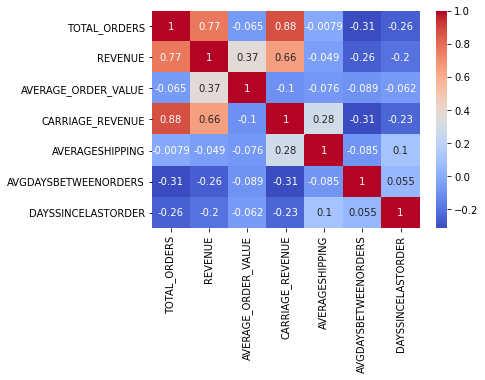

In [11]:
df1_1 = df1[n1]
sns.heatmap(df1_1.corr(), annot = True, cmap = 'coolwarm')

<AxesSubplot:>

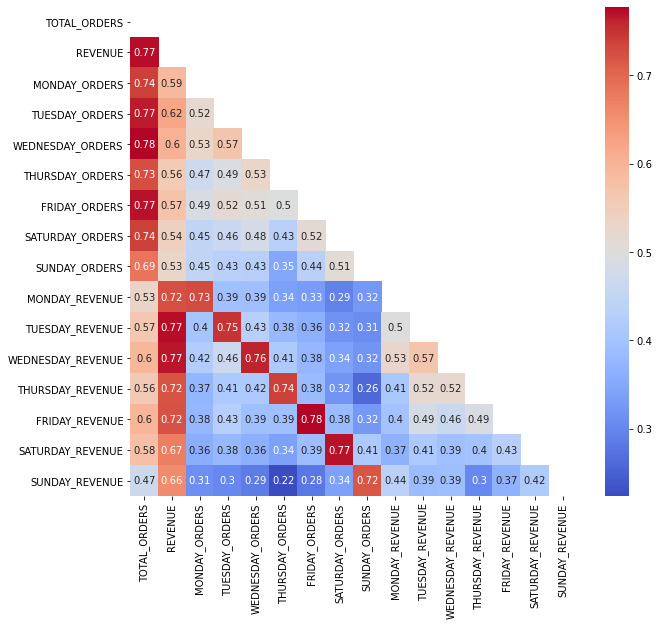

In [12]:
plt.figure(figsize=(10,9))
df1_2 = df1[n2]
upp_mat = np.triu(df1_2.corr())
sns.heatmap(df1_2.corr(), annot = True, cmap = 'coolwarm', mask=upp_mat)

<AxesSubplot:>

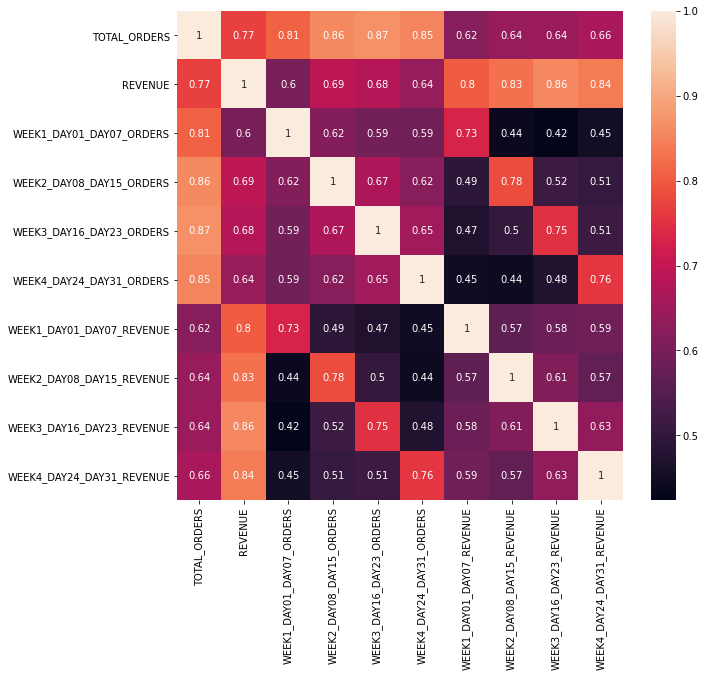

In [13]:
plt.figure(figsize=(10,9))
df1_3 = df1[n3]
sns.heatmap(df1_3.corr(), annot = True)

<AxesSubplot:>

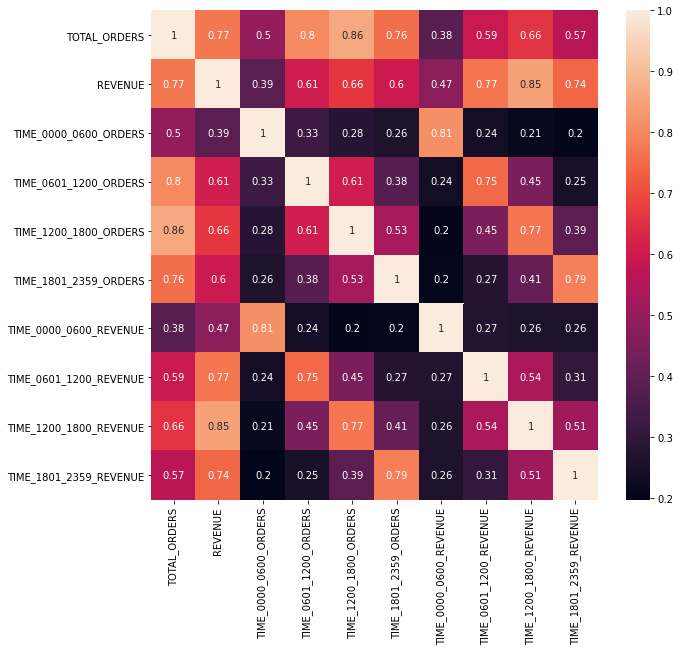

In [14]:
plt.figure(figsize=(10,9))
df1_4 = df1[n4]
upp_mat1 = np.triu(df1_4.corr())
sns.heatmap(df1_4.corr(), annot = True)

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOTAL_ORDERS', ylabel='REVENUE'>

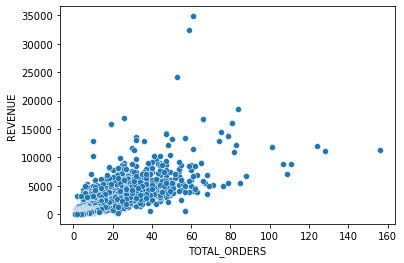

In [15]:
sns.scatterplot(df1['TOTAL_ORDERS'], df1['REVENUE'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AVERAGE_ORDER_VALUE', ylabel='AVERAGESHIPPING'>

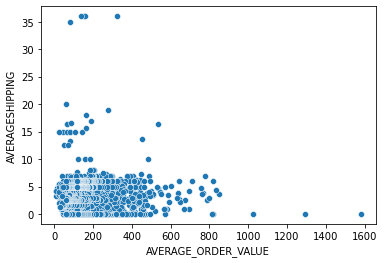

In [16]:
sns.scatterplot(df1['AVERAGE_ORDER_VALUE'], df['AVERAGESHIPPING'])

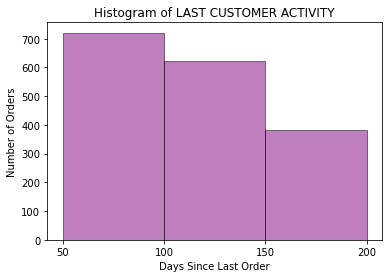

In [17]:
plt.hist(df1['DAYSSINCELASTORDER'], bins=[50,100,150,200], density=False,
         histtype='bar',
         color='purple',
         edgecolor='k',
         alpha=0.5)
plt.xlabel('Days Since Last Order')
plt.xticks([50,100,150,200])
plt.ylabel('Number of Orders')
plt.title('Histogram of LAST CUSTOMER ACTIVITY')
plt.show()

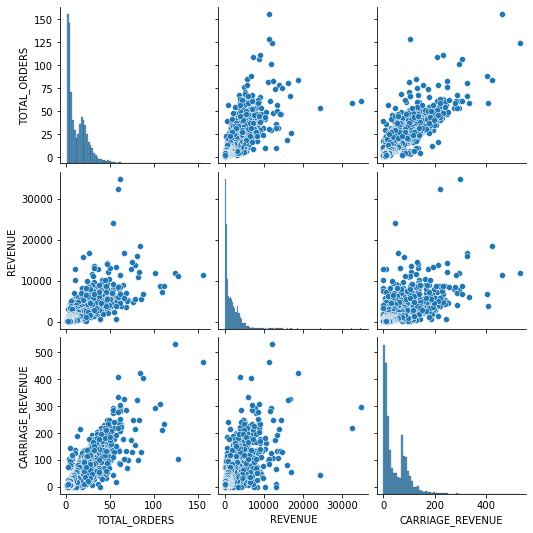

In [18]:
dat = df1[['TOTAL_ORDERS', 'REVENUE','CARRIAGE_REVENUE']]

sns.pairplot(dat, kind="scatter")
plt.show()

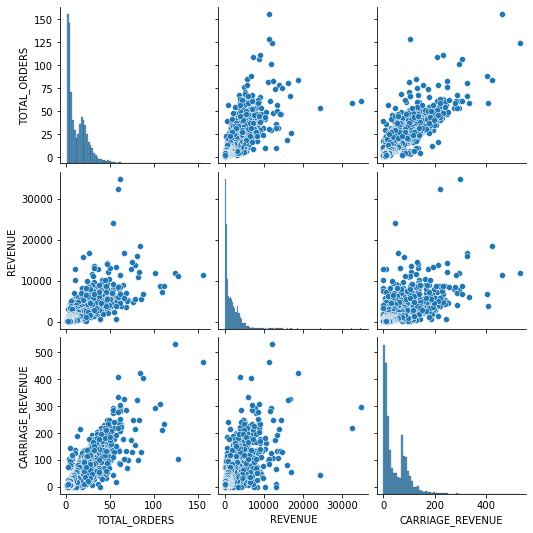

In [19]:
dat1 = df1[['TOTAL_ORDERS','WEEK1_DAY01_DAY07_ORDERS','WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS']]

sns.pairplot(dat, kind="scatter")
plt.show()

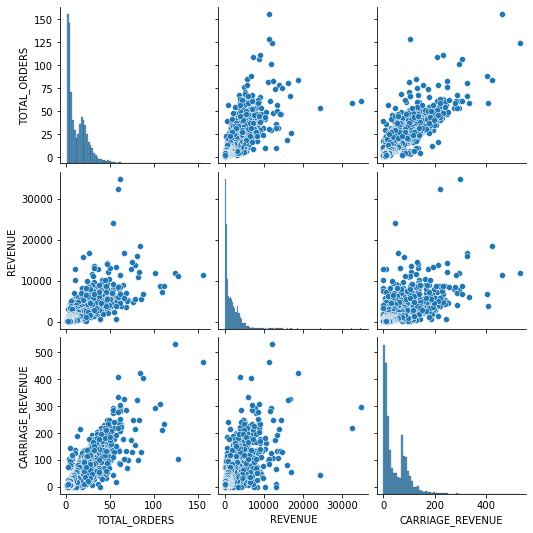

In [20]:
dat1 = df1[['TOTAL_ORDERS','TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS', 'TIME_1801_2359_ORDERS']]

sns.pairplot(dat, kind="scatter")
plt.show()

## Data Cleaning For RFM Analysis
We begin with editting the dataframe and making use of the columns which contribute to the RFM Analysis.

In [21]:
droppers = ['FIRST_ORDER_DATE','CARRIAGE_REVENUE','AVERAGESHIPPING','AVERAGE_ORDER_VALUE','AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER',
       'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE']

In [22]:
df1.drop(droppers, axis=1, inplace=True)

In [23]:
df1

CustomerID  TOTAL_ORDERS   REVENUE LATEST_ORDER_DATE
0             22           124  11986.54        2021-10-24
1             29            82  11025.96        2021-10-24
2             83            43   7259.69        2021-10-24
3             95            44   6992.27        2021-10-24
4            124            55   6263.44        2021-10-24
...          ...           ...       ...               ...
4995      173946             1    117.49        2021-04-01
4996      173987             1    117.49        2021-04-01
4997      174004             1    117.49        2021-04-01
4998      174038             1    117.49        2021-04-01
4999      200783             2     94.14        2021-04-01

[5000 rows x 4 columns]

## RFM Analysis 
RFM stands for these 3 dimensions:
 1.> Recency - How recently did the customer buy?
 2.> Frequency - How often do they purchase?
 3.> Monetary - How much do they spend?

In [24]:
df1['LATEST_ORDER_DATE'] = pd.to_datetime(df1['LATEST_ORDER_DATE'], format='%d-%m-%Y')

df1['duration'] = df1['LATEST_ORDER_DATE'].max() - df1['LATEST_ORDER_DATE']
df1['duration']

0        0 days
1        0 days
2        0 days
3        0 days
4        0 days
         ...   
4995   206 days
4996   206 days
4997   206 days
4998   206 days
4999   206 days
Name: duration, Length: 5000, dtype: timedelta64[ns]

In [25]:
recency = df1.groupby('CustomerID')['duration'].min()
recency = recency.reset_index()
recency.head()

CustomerID duration
0           1  52 days
1           2  93 days
2           3  52 days
3           4   4 days
4           5 129 days

In [26]:
frequency = df1.groupby('CustomerID')['TOTAL_ORDERS'].sum()
frequency = frequency.reset_index()
frequency.head()


CustomerID  TOTAL_ORDERS
0           1            61
1           2            59
2           3            53
3           4            84
4           5            26

In [27]:
revenue_contributed = df1.groupby('CustomerID')['REVENUE'].sum()
revenue_contributed = revenue_contributed.reset_index()
revenue_contributed.head()


CustomerID   REVENUE
0           1  34847.40
1           2  32486.98
2           3  24178.97
3           4  18554.49
4           5  16884.99

In [28]:
rf = pd.merge(recency,frequency, on='CustomerID', how='inner')
rfm = pd.merge(rf, revenue_contributed, on='CustomerID', how='inner')
rfm.columns = ['CustomerID','recency','frequency', 'monetary']
rfm['recency'] = rfm['recency'].dt.days
rfm.head()

CustomerID  recency  frequency  monetary
0           1       52         61  34847.40
1           2       93         59  32486.98
2           3       52         53  24178.97
3           4        4         84  18554.49
4           5      129         26  16884.99

## RFM Score
Here we are assigning Customer Segments for each Customer based on the RFM Score.

In [29]:
rfm['R_rank'] = rfm['recency'].rank(ascending=False)
rfm['F_rank'] = rfm['frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100
 
rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm.head()

CustomerID  recency  frequency  monetary  R_rank_norm  F_rank_norm  \
0           1       52         61  34847.40    60.818192        99.35   
1           2       93         59  32486.98    47.207669        99.19   
2           3       52         53  24178.97    60.818192        98.82   
3           4        4         84  18554.49    85.319362        99.82   
4           5      129         26  16884.99    35.949170        87.51   

   M_rank_norm  
0        99.35  
1        99.19  
2        98.82  
3        99.82  
4        87.51

In [30]:
rfm['RFM_Score'] = 0.15*rfm['R_rank_norm']+0.28 * \
    rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
rfm['RFM_Score'] *= 0.05
rfm = rfm.round(2)
rfm[['CustomerID', 'RFM_Score']].head(7)

CustomerID  RFM_Score
0           1       4.68
1           2       4.57
2           3       4.66
3           4       4.88
4           5       3.99
5           6       4.74
6           7       4.54

In [31]:
rfm["Customer_segment"] = np.where(rfm['RFM_Score'] >
                                      4.5, "Champion",
                                      (np.where(
                                        rfm['RFM_Score'] > 4,
                                        "Potential Customer",
                                        (np.where(
    rfm['RFM_Score'] > 3,"Need Attention",
                                        np.where(rfm['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Inactive Customers'))))))
rfm[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

CustomerID  RFM_Score     Customer_segment
0            1       4.68             Champion
1            2       4.57             Champion
2            3       4.66             Champion
3            4       4.88             Champion
4            5       3.99       Need Attention
5            6       4.74             Champion
6            7       4.54             Champion
7            8       3.55       Need Attention
8            9       4.55             Champion
9           10       4.75             Champion
10          11       4.64             Champion
11          12       4.81             Champion
12          13       4.28   Potential Customer
13          14       4.44   Potential Customer
14          15       4.77             Champion
15          16       4.28   Potential Customer
16          17       4.69             Champion
17          18       2.63  Low Value Customers
18          19       4.74             Champion
19          20       4.76             Champion

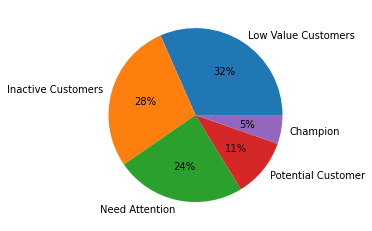

In [32]:
plt.pie(rfm.Customer_segment.value_counts(),
        labels=rfm.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [33]:
customer_agg = rfm.groupby('Customer_segment').agg({'RFM_Score':'count'}).reset_index()
customer_agg

Customer_segment  RFM_Score
0             Champion        268
1   Inactive Customers       1402
2  Low Value Customers       1579
3       Need Attention       1206
4   Potential Customer        545

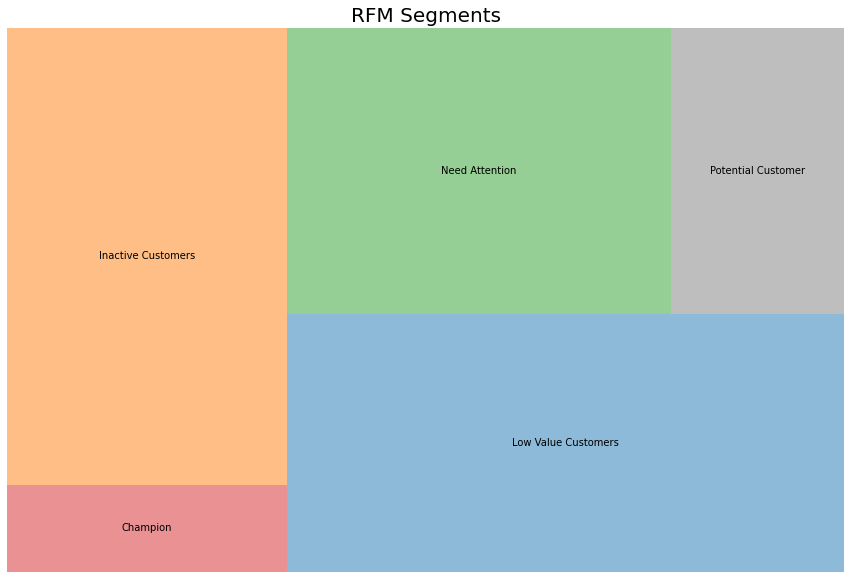

In [34]:
import squarify
fig, ax = plt.subplots(1, figsize = (15,10))
plt.title('RFM Segments', fontsize=20)
squarify.plot(sizes=customer_agg['RFM_Score'], 
              label=customer_agg['Customer_segment'], 
              alpha=.5,
              color=['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:gray']
             )
plt.axis('off')
plt.show()

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recency'>

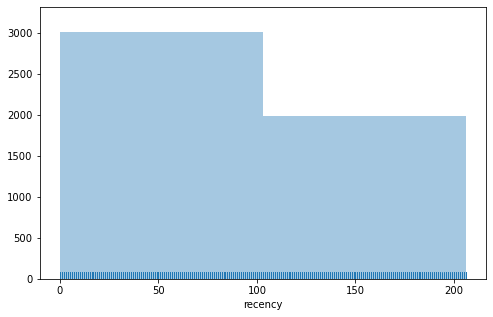

In [35]:
plt.figure(figsize=(8,5))
sns.distplot(rfm.recency, bins=2, kde=False, rug=True)

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='frequency'>

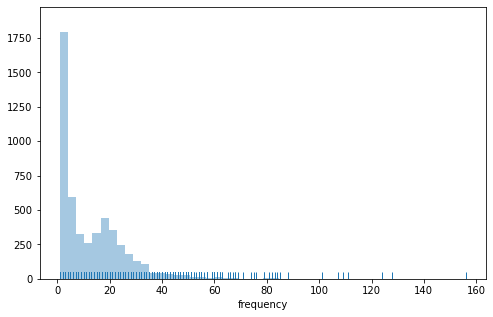

In [36]:
plt.figure(figsize=(8,5))
sns.distplot(rfm.frequency, kde=False, rug=True)

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monetary'>

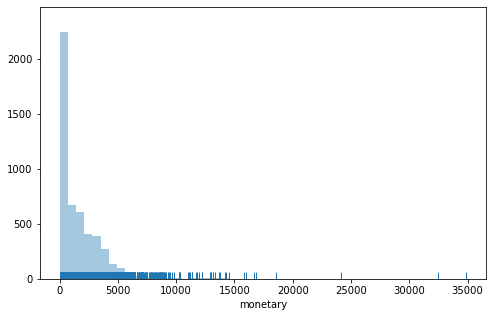

In [37]:
plt.figure(figsize=(8,5))
sns.distplot(rfm.monetary, kde=False, rug=True)

In [38]:
rfm.drop(['R_rank_norm','F_rank_norm','M_rank_norm'], axis=1, inplace=True)

            CustomerID   recency  frequency  monetary  RFM_Score
CustomerID    1.000000  0.375343  -0.608092 -0.556489  -0.814829
recency       0.375343  1.000000  -0.256272 -0.197782  -0.469373
frequency    -0.608092 -0.256272   1.000000  0.771996   0.855495
monetary     -0.556489 -0.197782   0.771996  1.000000   0.681734
RFM_Score    -0.814829 -0.469373   0.855495  0.681734   1.000000


<AxesSubplot:>

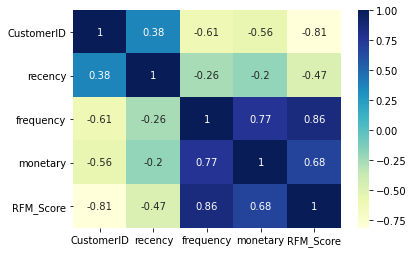

In [39]:
print(rfm.corr())
sns.heatmap(rfm.corr(), cmap='YlGnBu', annot=True)

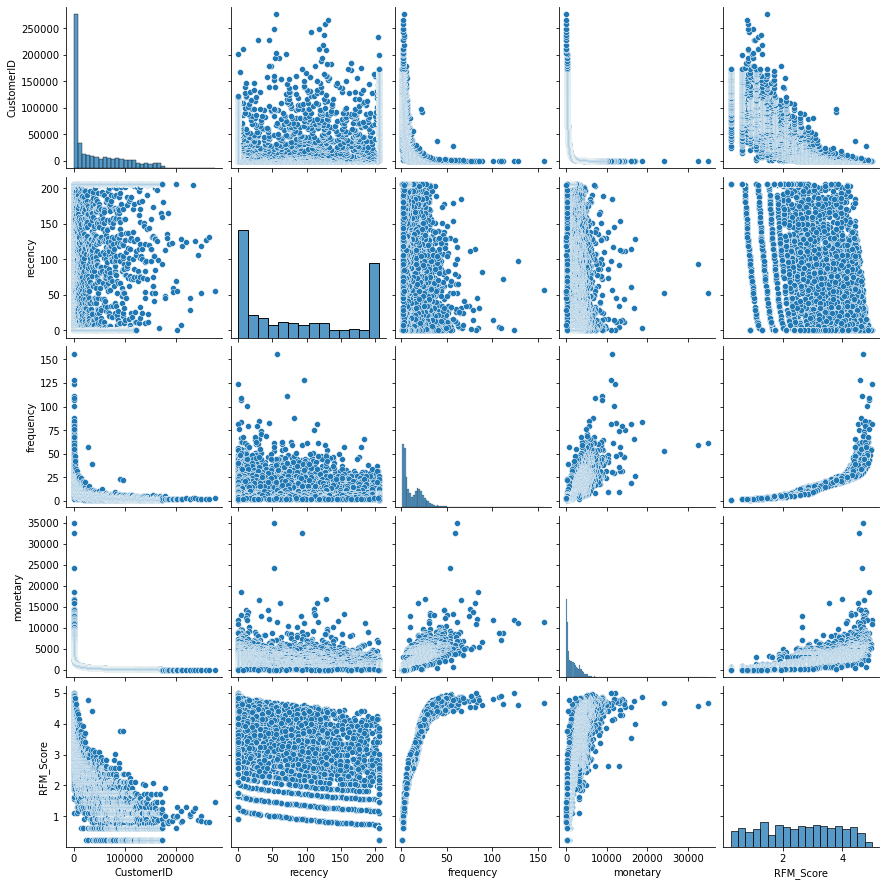

In [40]:
sns.pairplot(rfm, diag_kind="hist")

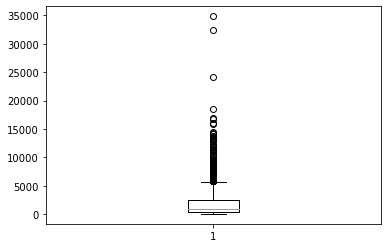

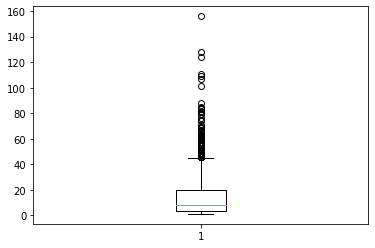

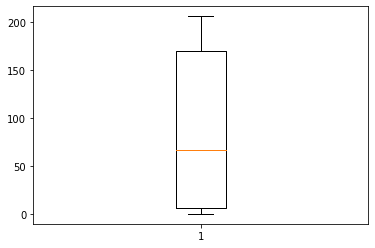

In [41]:
plt.boxplot(rfm['monetary'])
plt.show()
plt.boxplot(rfm['frequency'])
plt.show()
plt.boxplot(rfm['recency'])
plt.show()

## Customer Segmentation using K-means

In [42]:
scale = StandardScaler()
cols = ['monetary', 'frequency', 'recency']
rfm_scaler = scale.fit_transform(rfm[cols])

In [43]:
rfm_scaled = pd.DataFrame(rfm_scaler)
rfm_scaled.columns = ['monetary', 'frequency', 'recency']
rfm_scaled.head()

monetary  frequency   recency
0  16.596059   3.796125 -0.429453
1  15.414915   3.638379  0.082098
2  11.257623   3.165141 -0.429453
3   8.443158   5.610204 -1.028341
4   7.607748   1.035571  0.531264

           monetary  frequency   recency
monetary   1.000000   0.771996 -0.197782
frequency  0.771996   1.000000 -0.256272
recency   -0.197782  -0.256272  1.000000


<AxesSubplot:>

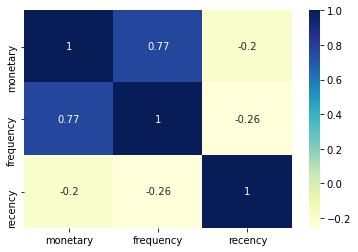

In [44]:
print(rfm_scaled.corr())
sns.heatmap(rfm_scaled.corr(), cmap='YlGnBu', annot=True)

In [45]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(rfm_scaled)
    
    ssd.append(kmeans.inertia_)

In [46]:
distances = pd.DataFrame({"clusters": range_n_clusters,"sum of squared distances": ssd})
distances

clusters  sum of squared distances
0         2               9307.182511
1         3               5839.122928
2         4               4135.476023
3         5               3458.600295
4         6               2862.683139
5         7               2555.881790
6         8               2282.952420

## Finding the optimal number of clusters
The elbow method finds the value of the optimal number of clusters using the total within-cluster sum of square values. This represents how spread-apart the generated clusters are from one another. In this case, the K-means algorithm is evaluated for several values of k, and the within-cluster sum of square values is calculated for each value of k. After this, we plot the K versus the sum of square values. After analyzing this graph, the number of clusters is selected, so that adding a new cluster doesn’t change the values of the sum of square values significantly.

In [47]:
# Finding optimal number of clusters k
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),                  
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

In [48]:
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhoutte_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("for n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhoutte_avg))

for n_clusters=2, the silhouette score is 0.39265595120312474
for n_clusters=3, the silhouette score is 0.4669465547290046
for n_clusters=4, the silhouette score is 0.5032406680128116
for n_clusters=5, the silhouette score is 0.49431262691437716
for n_clusters=6, the silhouette score is 0.49761473327597466
for n_clusters=7, the silhouette score is 0.472283939227029
for n_clusters=8, the silhouette score is 0.4784337780896125


The Optimal No_of_cluster =5 as silhouette score is maximum.

In [49]:
kmeans_model_new = KMeans(n_clusters = 5 , init='k-means++',max_iter=400,random_state=42)
kmeans_model_new.fit_predict(rfm_scaled)

array([4, 4, 4, ..., 0, 0, 1])

In [50]:
rfm_scaled.loc[:,'CustomerID'] = rfm['CustomerID']

In [51]:
rfm_scaled

monetary  frequency   recency  CustomerID
0     16.596059   3.796125 -0.429453           1
1     15.414915   3.638379  0.082098           2
2     11.257623   3.165141 -0.429453           3
3      8.443158   5.610204 -1.028341           4
4      7.607748   1.035571  0.531264           5
...         ...        ...       ...         ...
4995  -0.811428  -0.857381 -0.416976      248709
4996  -0.811433  -0.857381  0.394019      248710
4997  -0.815437  -0.857381  0.506310      259042
4998  -0.818439  -0.857381  0.556218      266024
4999  -0.822162  -0.778508 -0.379545      277160

[5000 rows x 4 columns]

In [52]:
rfm_scaled['clusters'] = kmeans_model_new.labels_
rfm_scaled.head()

monetary  frequency   recency  CustomerID  clusters
0  16.596059   3.796125 -0.429453           1         4
1  15.414915   3.638379  0.082098           2         4
2  11.257623   3.165141 -0.429453           3         4
3   8.443158   5.610204 -1.028341           4         4
4   7.607748   1.035571  0.531264           5         4

In [53]:
rfm_scaled.loc[:,'Customer_segment'] = rfm['Customer_segment']
rfm_scaled

monetary  frequency   recency  CustomerID  clusters    Customer_segment
0     16.596059   3.796125 -0.429453           1         4            Champion
1     15.414915   3.638379  0.082098           2         4            Champion
2     11.257623   3.165141 -0.429453           3         4            Champion
3      8.443158   5.610204 -1.028341           4         4            Champion
4      7.607748   1.035571  0.531264           5         4      Need Attention
...         ...        ...       ...         ...       ...                 ...
4995  -0.811428  -0.857381 -0.416976      248709         1  Inactive Customers
4996  -0.811433  -0.857381  0.394019      248710         0  Inactive Customers
4997  -0.815437  -0.857381  0.506310      259042         0  Inactive Customers
4998  -0.818439  -0.857381  0.556218      266024         0  Inactive Customers
4999  -0.822162  -0.778508 -0.379545      277160         1  Inactive Customers

[5000 rows x 6 columns]

## Visualizing customer segments

In [54]:
figure = px.scatter_3d(rfm_scaled,
                    color='clusters',
                    x="recency",
                    y="frequency",
                    z="monetary",            
                    category_orders = {"clusters": ["0", "1", "2"]}                    
                    )
figure.update_layout()
figure.show()